In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/ex1data1.csv', header=None)
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values #Returns 1D array

In [3]:
X = np.transpose(X)
Y = Y.reshape(1, -1) #1D array is not transposable, so reshaping it to a column matrix

Text(0.5, 0, 'Population of City in 10,000s')

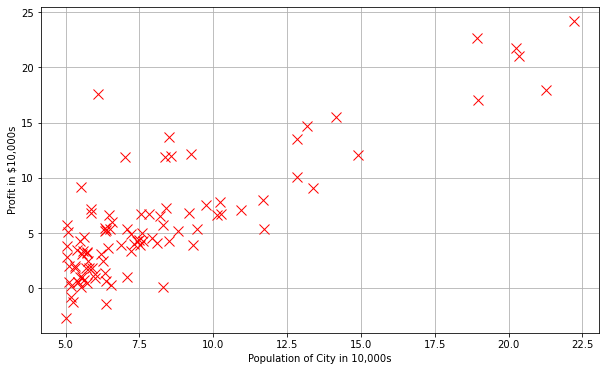

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'rx', markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [5]:
def h(w, b, X):
    #np.dot(A, B) does matrix multiplication of A and B
    #A*B does elementwise product of A and B
    return np.dot(w.T, X) + b 

In [6]:
def computeCost(w, b, X, Y):
    m = X.shape[1] #Shape returns [rows, columns]
    H = h(w, b, X)
    J = (1/(2*m)) * np.dot((H-Y), (H-Y).T)
    return J[0][0]

#Test that running computeCost with 0's as theta returns 32.07:
initial_w = np.zeros((X.shape[0],1))
initial_b = 0
print(computeCost(initial_w, initial_b, X, Y))

32.072733877455676


In [7]:
def forwardPropagation(X, Y, w, b, alpha):
    m = X.shape[1]
    H = h(w, b, X)
    dw = (alpha/m) * np.dot(X, (H - Y).T)
    db = (alpha/m) * np.sum(H - Y)
    return {
        "dw": dw,
        "db": db
    }

In [8]:
def gradientDescent(X, Y, alpha=0.01, numIterations=1500):
    w = np.zeros((X.shape[0], 1))
    b = 0
    J = []
    Params = []
    for i in range(numIterations):
        J.append(computeCost(w, b, X, Y))
        Params.append(list(np.append(w[:, 0], b))) #took some time to come up with this
        dH = forwardPropagation(X, Y, w, b, alpha)
        w = w - dH["dw"]
        b = b - dH["db"]
    return {
        "J": J,
        "Params": Params,
        "w": w,
        "b": b
    }

In [9]:
model = gradientDescent(X, Y)

In [10]:
def plotConvergence(J, numIterations=1500):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(J)),J,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*numIterations,1.05*numIterations])

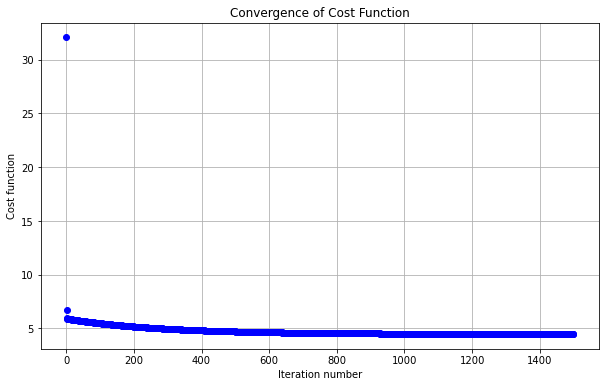

In [11]:
plotConvergence(model["J"])

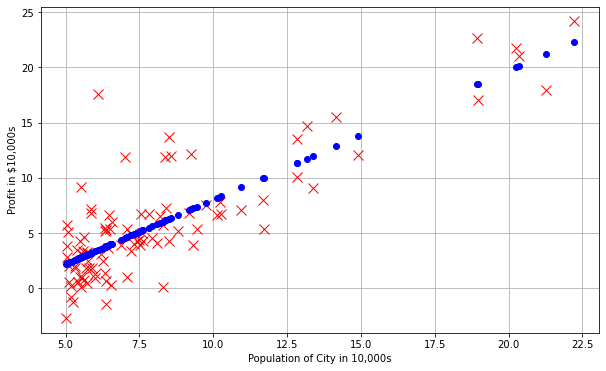

In [12]:
def predict(w, b, X):
    return np.dot(w.T,X) + b
w = model["w"]
b = model["b"]
yhat = predict(w, b, X)
plt.figure(figsize=(10,6))
plt.plot(X, Y, 'rx', markersize=10)
plt.plot(X, yhat, 'bo--', linewidth=2) #unable to plot line for some reason
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

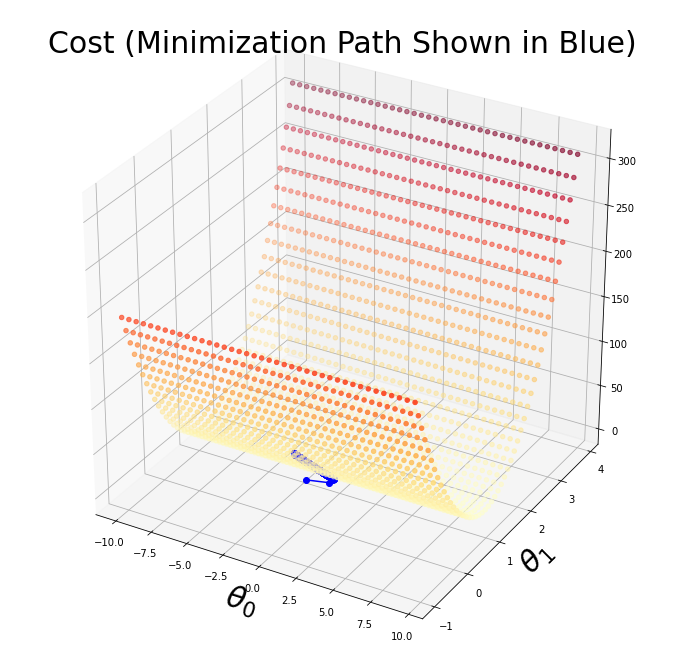

In [13]:
# Got this code from here https://github.com/kaleko/CourseraML/blob/master/ex1/ex1.ipynb

from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
Params = model["Params"]
J = model["J"]
bvals = np.arange(-10, 10, .5)
wvals = np.arange(-1, 4, .1)
myxs, myys, myzs = [], [], []
for cb in bvals:
    for cw in wvals:
        myxs.append(cb)
        myys.append(cw)
        myzs.append(computeCost(np.array([[cw]]), b, X, Y))

scat = ax.scatter(myxs, myys, myzs, c=np.abs(myzs), cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[1] for x in Params],[x[0] for x in Params], J, 'bo-')
plt.show()